In [1]:
print("Hello")
## just for test

Hello


### GET&Check data

In [2]:
import pandas as pd
import numpy as np

sub=pd.read_csv("/home/junseo/Desktop/2023_1st_vacation/KRX_py/KRX_DATA/open/sample_submission.csv")
data=pd.read_csv("/home/junseo/Desktop/2023_1st_vacation/KRX_py/KRX_DATA/open/train.csv")

In [3]:
sub

,종목코드,순위
0,A000020,1
1,A000040,2
2,A000050,3
3,A000070,4
4,A000080,5
...,...,...
1995,A375500,1996
1996,A378850,1997
1997,A383220,1998
1998,A383310,1999


In [4]:
data

,일자,종목코드,종목명,거래량,시가,고가,저가,종가
0,20210601,A060310,3S,166690,2890,2970,2885,2920
1,20210601,A095570,AJ네트웍스,63836,5860,5940,5750,5780
2,20210601,A006840,AK홀딩스,103691,35500,35600,34150,34400
3,20210601,A054620,APS,462544,14600,14950,13800,14950
4,20210601,A265520,AP시스템,131987,29150,29150,28800,29050
...,...,...,...,...,...,...,...,...
987995,20230530,A189980,흥국에프엔비,272284,3005,3035,2955,2980
987996,20230530,A000540,흥국화재,50218,3250,3255,3195,3215
987997,20230530,A003280,흥아해운,130664,1344,1395,1340,1370
987998,20230530,A037440,희림,141932,9170,9260,9170,9200


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988000 entries, 0 to 987999
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   일자      988000 non-null  int64 
 1   종목코드    988000 non-null  object
 2   종목명     988000 non-null  object
 3   거래량     988000 non-null  int64 
 4   시가      988000 non-null  int64 
 5   고가      988000 non-null  int64 
 6   저가      988000 non-null  int64 
 7   종가      988000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 60.3+ MB


- Data Analisys

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

data.head()

,일자,종목코드,종목명,거래량,시가,고가,저가,종가
0,20210601,A060310,3S,166690,2890,2970,2885,2920
1,20210601,A095570,AJ네트웍스,63836,5860,5940,5750,5780
2,20210601,A006840,AK홀딩스,103691,35500,35600,34150,34400
3,20210601,A054620,APS,462544,14600,14950,13800,14950
4,20210601,A265520,AP시스템,131987,29150,29150,28800,29050


In [7]:
data["일자"]

0         20210601
1         20210601
2         20210601
3         20210601
4         20210601
            ...   
987995    20230530
987996    20230530
987997    20230530
987998    20230530
987999    20230530
Name: 일자, Length: 988000, dtype: int64

In [8]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

2023-07-04 21:38:08.432269: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-04 21:38:08.510972: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-04 21:38:08.885364: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-04 21:38:08.886738: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-04 21:38:09.822912: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [9]:
from sklearn.preprocessing import MinMaxScaler

[sequence of the work]
1. make data index by company
2. delete word data
3. make AOC label
(sorted by date)

- to get resonable end price should get 'amount of change'
- !!!need help!!!
- slice data and make new index AOC
- ((datbefore endprice)-endprice)/100

[07.04]
- 밑 테이블 대로 회사명으로 인덱스 수정되있음
- ()란이 주가 변동률 넣어야 하는 란 변동률은 위 마크다운 참조.
- 회사마다 정수 자료형으로 번호 부여하고 인덱스 리스트 만들어서 마지막에 시리즈데이터로 값 넘기면 될듯
- 각 종목별 첫날 변화량은 0%로 두고 시작하는게 낫지 않을라남

In [10]:
#sort data by "종목명"
subject_Data=data.sort_values(by="종목명",inplace=False)
subject_Data.head()
subject_Data.columns

Index(['일자', '종목코드', '종목명', '거래량', '시가', '고가', '저가', '종가'], dtype='object')

In [11]:
pv_s_data=pd.pivot_table(subject_Data,values=['거래량', '시가', '고가', '저가', '종가'],index=['종목코드','일자'])

In [12]:
pv_s_data

거래량     고가     시가     저가     종가
종목코드    일자                                          
A000020 20210601  114966  14700  14700  14450  14600
        20210602  109559  14700  14700  14450  14500
        20210603   96158  14650  14550  14450  14600
        20210604  133900  14800  14600  14550  14700
        20210607  511140  15550  14800  14750  15150
...                  ...    ...    ...    ...    ...
A383800 20230523  150364   8390   8390   8310   8330
        20230524  122457   8340   8310   8280   8300
        20230525   84241   8310   8300   8270   8310
        20230526  126681   8310   8300   8270   8280
        20230530   70489   8300   8300   8270   8290

[988000 rows x 5 columns]

In [13]:
pv_s_data["AOC"]=int(1)

In [14]:
pv_s_data["cnt"]=int(1)

In [15]:
pv_s_data.loc["A000020",:]

,거래량,고가,시가,저가,종가,AOC,cnt
일자,,,,,,,
20210601,114966,14700,14700,14450,14600,1,1
20210602,109559,14700,14700,14450,14500,1,1
20210603,96158,14650,14550,14450,14600,1,1
20210604,133900,14800,14600,14550,14700,1,1
20210607,511140,15550,14800,14750,15150,1,1
...,...,...,...,...,...,...,...
20230523,641524,9900,9160,9160,9770,1,1
20230524,205243,9820,9770,9550,9740,1,1
20230525,398326,10180,9660,9660,10040,1,1


,거래량,고가,시가,저가,종가,AOC,cnt
일자,,,,,,,
20210601,1879288,11300,11000,10900,11000,1,1
20210602,2426922,10850,10700,10600,10700,1,1
20210603,2709800,10700,10650,10300,10400,1,1
20210604,1737593,10650,10450,10350,10450,1,1
20210607,2714980,11150,10550,10500,10800,1,1
...,...,...,...,...,...,...,...
20230523,150364,8390,8390,8310,8330,1,1
20230524,122457,8340,8310,8280,8300,1,1
20230525,84241,8310,8300,8270,8310,1,1


In [17]:
def getAOC(data):
  AOC = []
  close = data['종가']

  # aoc = (금일 종가 - 전일 종가) / 전일 종가
  for i in range(len(close)):
    aoc_value = ((close[i] - close[i-1]) / close[i-1]) * 100
    AOC.append(aoc_value)

  AOC[0] = 0    #첫 index에는 이전 정보가 없어서 임의의 값으로 초기화 시켜주고 return함
  return AOC

In [18]:
pv_s_data["AOC"] = getAOC(pv_s_data)
pv_s_data


거래량     고가     시가     저가     종가       AOC  cnt
종목코드    일자                                                         
A000020 20210601  114966  14700  14700  14450  14600  0.000000    1
        20210602  109559  14700  14700  14450  14500 -0.684932    1
        20210603   96158  14650  14550  14450  14600  0.689655    1
        20210604  133900  14800  14600  14550  14700  0.684932    1
        20210607  511140  15550  14800  14750  15150  3.061224    1
...                  ...    ...    ...    ...    ...       ...  ...
A383800 20230523  150364   8390   8390   8310   8330 -0.358852    1
        20230524  122457   8340   8310   8280   8300 -0.360144    1
        20230525   84241   8310   8300   8270   8310  0.120482    1
        20230526  126681   8310   8300   8270   8280 -0.361011    1
        20230530   70489   8300   8300   8270   8290  0.120773    1

[988000 rows x 7 columns]

In [20]:
pv_s_data.loc["A383800",:]


,거래량,고가,시가,저가,종가,AOC,cnt
일자,,,,,,,
20210601,1879288,11300,11000,10900,11000,-82.258065,1
20210602,2426922,10850,10700,10600,10700,-2.727273,1
20210603,2709800,10700,10650,10300,10400,-2.803738,1
20210604,1737593,10650,10450,10350,10450,0.480769,1
20210607,2714980,11150,10550,10500,10800,3.349282,1
...,...,...,...,...,...,...,...
20230523,150364,8390,8390,8310,8330,-0.358852,1
20230524,122457,8340,8310,8280,8300,-0.360144,1
20230525,84241,8310,8300,8270,8310,0.120482,1


/home/junseo/anaconda3/envs/KRX_python/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/home/junseo/anaconda3/envs/KRX_python/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/home/junseo/anaconda3/envs/KRX_python/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/home/junseo/anaconda3/envs/KRX_python/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/home/junseo/anaconda3/envs/KRX_python/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA

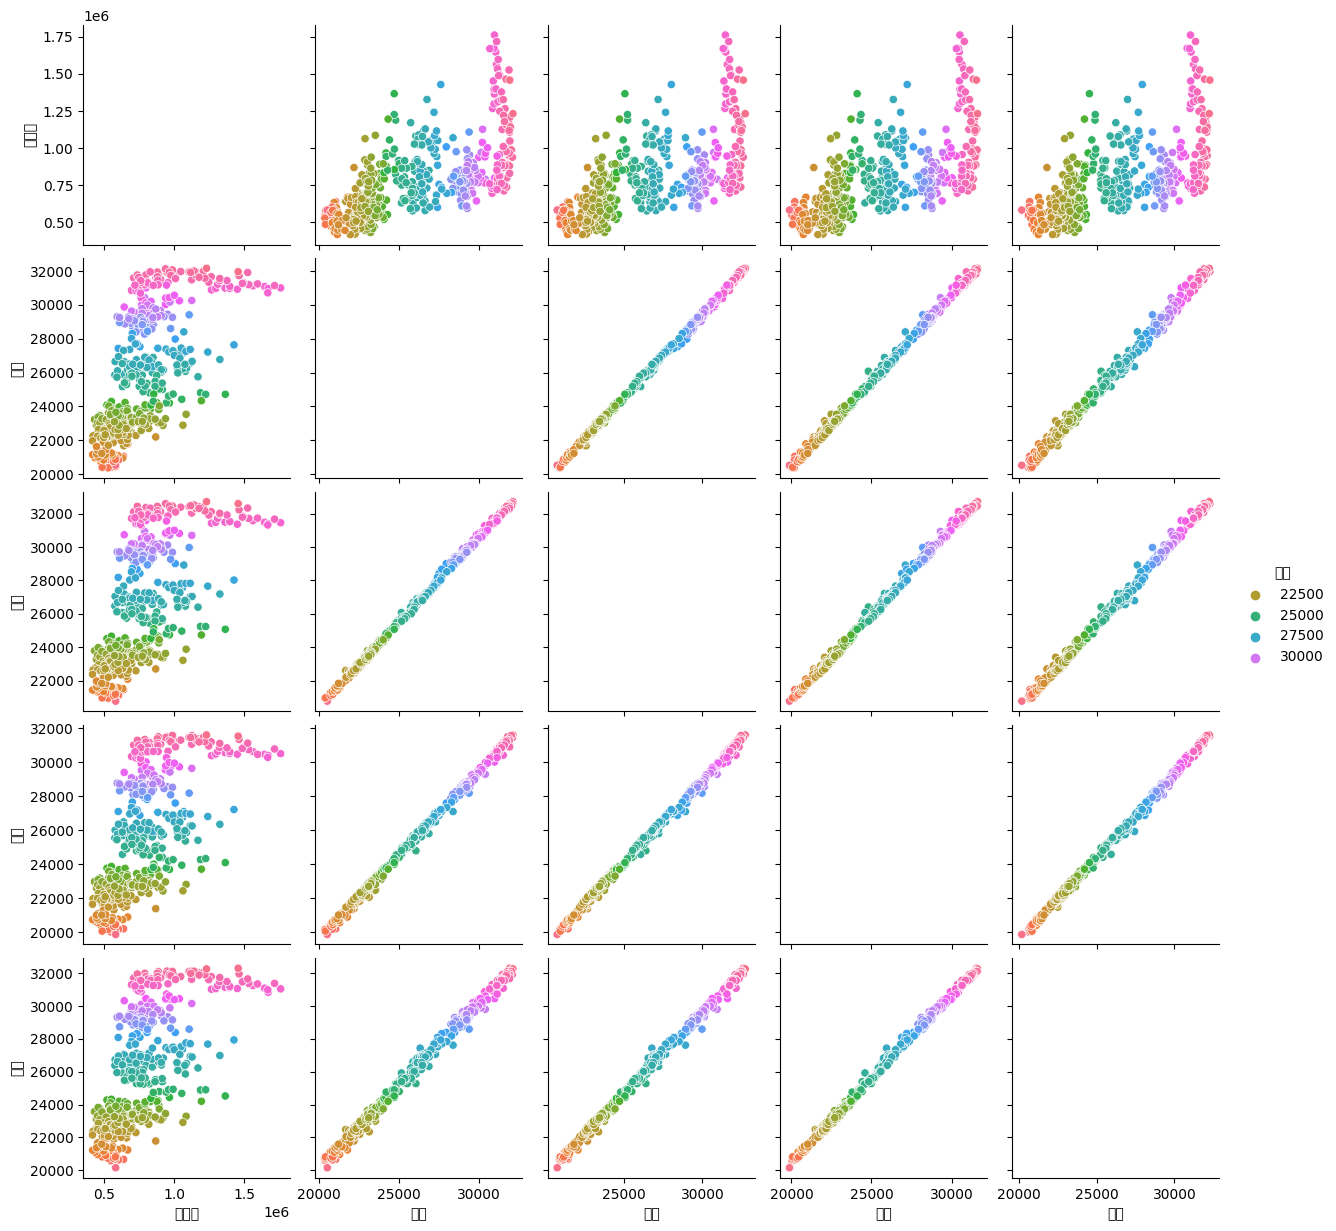

In [ ]:
#don't need company name
pv_analasys_data=pd.pivot_table(pv_s_data,values=['거래량', '시가', '고가', '저가', '종가'],index=['일자'])

scaler=MinMaxScaler()
scaler.fit(pv_s_data)

data_corr=pv_s_data.corr()
data_corr_sort=data_corr.sort_values("종가",ascending=False)

data_corr["종가"]

cols = ['거래량', '시가', '고가', '저가', '종가']
sns.pairplot(data = pv_analasys_data, vars = cols, hue = '종가', palette = 'husl')
plt.show()